# **YOLO v10 Object Detection**

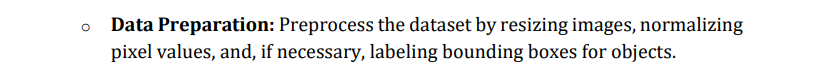

# **Preprocessing Techniques** such as Auto Orient and Resize: Stretch to 640x640 has already been applied in the roboflow environment before dataset export.

In [ ]:
import zipfile
import os

# Path to the zip file
dataset_zip_path = '/content/Flower(Multiclass).zip'

# Directory to extract to
extract_dir = '/content/Flower(Multiclass)/'

# Unzipping the file
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset unzipped to {extract_dir}")


Dataset unzipped to /content/Flower(Multiclass)/


In [ ]:
# Path to the data.yaml file
yaml_file_path = '/content/Flower(Multiclass)/data.yaml'

# Reading and displaying the content of the data.yaml file
with open(yaml_file_path, 'r') as file:
    data = file.read()
    print(data)


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 13
names: ['Common Lanthana', 'Hibiscus', 'Jatropha', 'Marigold', 'Rose', 'champaka', 'chitrak', 'honeysuckle', 'indian mallow', 'malabar melastome', 'shankupushpam', 'spider lily', 'sunflower']

roboflow:
  workspace: research-kiwbb
  project: annot-0abet
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/research-kiwbb/annot-0abet/dataset/1


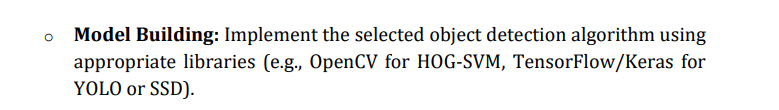

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 23.9 MB/s eta 0:00:00


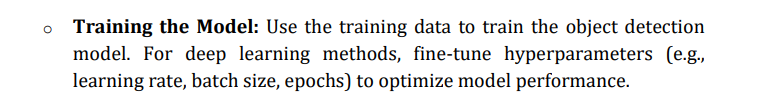

In [ ]:
from ultralytics import YOLO

# Load the model
model = YOLO('yolov10m.pt')

model.train(
    data='/content/Flower(Multiclass)/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    workers=4,
    name='yolov10m-flowerst1',
    device=0
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 32.1M/32.1M [00:00<00:00, 113MB/s]


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/Flower(Multiclass)/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=None, name=yolov10m-flowerst1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 19.3MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 125MB/s]


AMP: checks passed ✅


train: Scanning /content/Flower(Multiclass)/train/labels... 2340 images, 463 backgrounds, 0 corrupt: 100%|██████████| 2340/2340 [00:01<00:00, 1683.63it/s]


train: New cache created: /content/Flower(Multiclass)/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Flower(Multiclass)/valid/labels... 669 images, 141 backgrounds, 0 corrupt: 100%|██████████| 669/669 [00:00<00:00, 873.75it/s]


val: New cache created: /content/Flower(Multiclass)/valid/labels.cache
Plotting labels to runs/detect/yolov10m-flowerst1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10m-flowerst1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.08G      2.068      9.907      2.957          9        640: 100%|██████████| 147/147 [01:36<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.78it/s]

                   all        669        560      0.574      0.591      0.538      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.05G      2.264      3.813      2.961          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.08it/s]

                   all        669        560      0.423      0.482      0.337      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.06G       2.33      3.414      3.005          9        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.07it/s]

                   all        669        560      0.439       0.52      0.456      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.01G       2.34      3.127      3.033          6        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        669        560      0.531      0.572      0.548       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.05G      2.257      2.808      2.927          8        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all        669        560      0.654      0.533      0.573      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.01G      2.214       2.61      2.935          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]

                   all        669        560      0.576      0.738      0.671      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.03G      2.161      2.541      2.896          4        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        669        560      0.539      0.748      0.656      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.01G      2.111      2.361      2.854          6        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:13<00:00,  1.61it/s]

                   all        669        560      0.644      0.767      0.683      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.05G      2.058      2.303      2.792          9        640: 100%|██████████| 147/147 [01:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.94it/s]

                   all        669        560      0.607      0.794      0.667      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.01G      2.018      2.188      2.777          9        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.98it/s]

                   all        669        560      0.593      0.785      0.702      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.04G      2.012      2.091      2.782          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.13it/s]

                   all        669        560      0.537       0.77      0.691      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.01G      1.988      2.125      2.769          7        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all        669        560      0.627      0.791      0.692      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.06G      1.988      2.077      2.757         12        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.97it/s]

                   all        669        560      0.646      0.828      0.715      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         9G      1.894      1.929        2.7          4        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.06it/s]

                   all        669        560      0.642       0.84      0.709      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.04G      1.865       1.83      2.641          9        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.08it/s]

                   all        669        560      0.635      0.867      0.726      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.02G      1.879      1.898       2.69          4        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        669        560      0.625      0.855      0.702      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.06G       1.85      1.806       2.65          7        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        669        560      0.609      0.837      0.726      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.01G      1.887      1.784      2.681          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]

                   all        669        560      0.646      0.887      0.734      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.04G       1.84      1.822      2.655          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]

                   all        669        560      0.714      0.834      0.731      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.01G      1.841      1.752      2.644          7        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        669        560      0.676      0.836      0.717       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.07G      1.816      1.783      2.641          5        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]

                   all        669        560      0.644      0.892      0.722       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         9G      1.803      1.728      2.597          6        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.674      0.858      0.748      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.04G      1.772       1.69      2.604         10        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.07it/s]

                   all        669        560      0.727      0.845      0.743      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.01G      1.832      1.682      2.661         11        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]

                   all        669        560      0.683      0.887      0.734      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.06G      1.766      1.637      2.591          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.06it/s]

                   all        669        560       0.65      0.869      0.726      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.01G      1.769      1.671      2.592          7        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]

                   all        669        560      0.627      0.925      0.729      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.04G       1.73      1.543       2.58          7        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.12it/s]

                   all        669        560       0.68      0.914      0.743      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.01G      1.737      1.578      2.562          4        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all        669        560      0.667      0.876      0.743      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.05G      1.708      1.472      2.566          3        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.04it/s]

                   all        669        560      0.648      0.879      0.735      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         9G      1.692      1.513      2.525          6        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all        669        560      0.676       0.89      0.748        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.04G       1.69      1.532       2.54          8        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        669        560      0.659      0.871      0.752      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.01G      1.699      1.539      2.539          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        669        560      0.657      0.926       0.75      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.06G      1.663        1.5      2.548          9        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.96it/s]

                   all        669        560      0.682      0.868      0.735      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         9G      1.706      1.519       2.57          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.04it/s]

                   all        669        560      0.677      0.902      0.755       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.04G      1.678      1.495      2.523          5        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.11it/s]

                   all        669        560      0.683      0.897      0.729        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.01G      1.636      1.457      2.507          5        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]

                   all        669        560       0.65      0.915      0.727      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.06G      1.664      1.471      2.525          9        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]

                   all        669        560      0.677      0.914      0.731      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.01G      1.655      1.457      2.543          9        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.12it/s]

                   all        669        560      0.661      0.909      0.734      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.06G      1.682      1.448      2.539          6        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.677      0.922      0.745      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.01G      1.636      1.414      2.521          5        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.663      0.923      0.732      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.05G      1.614      1.426      2.516          4        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.16it/s]

                   all        669        560      0.689      0.923      0.755       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.01G      1.605      1.431      2.503          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.05it/s]

                   all        669        560      0.701      0.879      0.758      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.03G       1.64      1.393       2.51          4        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.99it/s]

                   all        669        560      0.682      0.908      0.738       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.01G      1.597      1.391      2.483          7        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.07it/s]

                   all        669        560      0.687      0.902      0.748      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.05G      1.591      1.371      2.488          3        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]

                   all        669        560      0.677      0.904      0.744      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         9G       1.56      1.344      2.454          5        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.714      0.898      0.754       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.04G      1.574      1.372      2.468          7        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560       0.68      0.926      0.748      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.01G      1.575      1.363      2.466          7        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.12it/s]

                   all        669        560      0.685      0.918      0.748      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.05G      1.576      1.354      2.501          5        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.10it/s]

                   all        669        560      0.716      0.869      0.759      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.01G      1.561      1.332       2.46          7        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]

                   all        669        560      0.699      0.909      0.758      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.04G      1.548      1.364      2.445         10        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.07it/s]

                   all        669        560      0.698      0.905      0.764       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.02G      1.554      1.326       2.45         10        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.99it/s]

                   all        669        560      0.692      0.882      0.757      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.04G      1.525      1.275      2.434          4        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.14it/s]

                   all        669        560      0.676      0.922      0.751      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         9G      1.508       1.26      2.418          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all        669        560      0.693        0.9      0.738      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.04G      1.525      1.264      2.438          9        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.683       0.93      0.745      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         9G      1.548       1.28      2.458          5        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]

                   all        669        560       0.69      0.911      0.742      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.05G      1.515      1.267      2.438          5        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.16it/s]

                   all        669        560      0.696      0.894      0.734      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.01G      1.494       1.25      2.432          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        669        560        0.7      0.901      0.741      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.03G      1.483      1.255      2.418          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        669        560      0.682      0.919      0.752      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.01G      1.528      1.246      2.424         10        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.06it/s]

                   all        669        560      0.695      0.908      0.744      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.07G      1.495      1.262      2.436         12        640: 100%|██████████| 147/147 [01:33<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.10it/s]

                   all        669        560      0.692      0.929      0.752      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.01G      1.478      1.285      2.418          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]

                   all        669        560      0.682      0.916      0.754      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.04G      1.523      1.239      2.432          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.04it/s]

                   all        669        560      0.688       0.94      0.752      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.01G      1.421      1.197      2.375          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.13it/s]

                   all        669        560       0.69      0.913      0.753      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.05G      1.473      1.232      2.418          6        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        669        560      0.695      0.908       0.75      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         9G      1.438       1.16      2.378          5        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560       0.71      0.891      0.758      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.04G      1.438       1.19      2.376         10        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]

                   all        669        560        0.7      0.909      0.759      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.01G      1.472      1.209      2.401          7        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.688      0.901      0.754      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.06G       1.45      1.216      2.385          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.04it/s]

                   all        669        560      0.678      0.913      0.749      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         9G       1.43      1.155      2.371          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.16it/s]

                   all        669        560      0.708      0.897      0.763      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.04G      1.426      1.166      2.357         12        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.08it/s]

                   all        669        560      0.699      0.919      0.753      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.01G      1.409      1.131      2.356          5        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.694       0.92      0.752      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.06G      1.404      1.125      2.349          7        640: 100%|██████████| 147/147 [01:32<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.12it/s]

                   all        669        560      0.687       0.92      0.763      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.01G      1.417      1.116      2.382          3        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.08it/s]

                   all        669        560      0.688      0.907      0.743      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.04G        1.4      1.131       2.36          6        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.678      0.908      0.761      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.01G      1.417       1.15      2.368          3        640: 100%|██████████| 147/147 [01:32<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all        669        560      0.696      0.915      0.769       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.06G      1.377      1.112      2.333         16        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]

                   all        669        560      0.679      0.908      0.752      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.01G      1.384      1.104      2.337         10        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]

                   all        669        560      0.692      0.889      0.755      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.03G      1.393      1.103      2.347          5        640: 100%|██████████| 147/147 [01:32<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.09it/s]

                   all        669        560      0.699      0.891      0.754      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.01G      1.389      1.105      2.339          5        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  1.96it/s]

                   all        669        560      0.687       0.89      0.754      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.05G      1.371      1.086      2.335          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        669        560       0.69      0.925      0.752      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.03G      1.331      1.072      2.295          7        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]

                   all        669        560      0.683      0.933      0.757      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.03G      1.346      1.043      2.316          9        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        669        560      0.715      0.912      0.768      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.01G      1.303      1.057      2.292          5        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.704      0.897      0.762      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.05G      1.283      1.036      2.281          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.04it/s]

                   all        669        560      0.694      0.904      0.753      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         9G      1.278      1.046      2.262          7        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        669        560      0.682      0.913      0.758      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.04G      1.313      1.023      2.298          8        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]

                   all        669        560      0.684      0.923      0.755      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.01G      1.285      1.025      2.296          5        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.03it/s]

                   all        669        560      0.704      0.892      0.762      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.05G      1.277      1.011      2.282          7        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.05it/s]

                   all        669        560      0.702      0.916      0.758      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.01G      1.326      1.042      2.307         10        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.11it/s]

                   all        669        560      0.704      0.897      0.758      0.641


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.04G      1.019     0.7681      2.135          4        640: 100%|██████████| 147/147 [01:32<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        669        560      0.698      0.906      0.763      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.99G     0.9946     0.7423      2.117          4        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.01it/s]

                   all        669        560      0.713      0.896      0.757      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.05G     0.9887     0.7231       2.14          4        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.08it/s]

                   all        669        560      0.703      0.893      0.755      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         9G     0.9622     0.6992      2.113          4        640: 100%|██████████| 147/147 [01:32<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.16it/s]

                   all        669        560      0.709      0.871      0.767      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.04G     0.9595     0.6824      2.102          3        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.06it/s]

                   all        669        560      0.698      0.896       0.76      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.01G     0.9472     0.6914      2.096          3        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.04it/s]

                   all        669        560      0.697      0.899      0.763       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.06G     0.9404     0.6931      2.098          2        640: 100%|██████████| 147/147 [01:31<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.00it/s]

                   all        669        560      0.696      0.902      0.755      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         9G     0.9268     0.6591      2.059          4        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.10it/s]

                   all        669        560      0.703      0.898      0.754      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.04G     0.9232     0.6596      2.053          4        640: 100%|██████████| 147/147 [01:32<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.10it/s]

                   all        669        560      0.689      0.897      0.756      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.01G     0.9188      0.661      2.082          3        640: 100%|██████████| 147/147 [01:31<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.02it/s]

                   all        669        560       0.69      0.873      0.749      0.634



100 epochs completed in 2.906 hours.
Optimizer stripped from runs/detect/yolov10m-flowerst1/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/yolov10m-flowerst1/weights/best.pt, 33.5MB

Validating runs/detect/yolov10m-flowerst1/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,465,438 parameters, 0 gradients, 63.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:11<00:00,  1.85it/s]


                   all        669        560      0.705      0.897      0.761      0.646
       Common Lanthana         18         18      0.385          1      0.449      0.383
              Hibiscus         26         26      0.491      0.731      0.667      0.583
              Jatropha         62         93      0.773      0.925      0.924      0.741
              Marigold         51         51      0.966       0.98      0.995      0.939
                  Rose         51         51      0.945       0.98      0.973      0.894
              champaka         32         32      0.607      0.965      0.637      0.604
               chitrak         35         35      0.479      0.894       0.56      0.431
           honeysuckle         25         25      0.404       0.56      0.404      0.247
         indian mallow         38         38      0.695          1      0.806      0.745
     malabar melastome         50         51      0.984       0.98       0.99      0.943
         shankupushpa

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b41fdcd78e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [ ]:
import shutil


folder_to_zip = 'runs/detect/yolov10m-flowerst1'
output_zip = 'yolov10m-FlowersOD.zip'


shutil.make_archive(output_zip.replace('.zip', ''), 'zip', folder_to_zip)

from google.colab import files

# Download the zipped folder
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

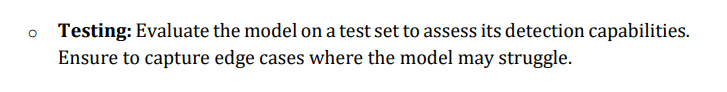

# **Testing Set (Unlabeled set of Images to ensure validity of the Object Detection)**

In [ ]:
import zipfile
import os

# Path to the zip file
dataset_zip_path = '/content/Testing set.zip'

# Directory to extract to
extract_dir = '/content/Testing set/'

# Unzipping the file
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset unzipped to {extract_dir}")


Dataset unzipped to /content/Testing set/



image 1/1 /content/Testing set/Testing set/spider_lily95_jpg.rf.fba7fa9f0337f02fb21ba0ea219b812f.jpg: 640x640 2 spider lilys, 35.1ms
Speed: 2.3ms preprocess, 35.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Testing set/Testing set/Rose61_jpg.rf.f0b48cc635061f0cd8bfdc7fce948ba2.jpg: 640x640 1 Rose, 32.7ms
Speed: 2.0ms preprocess, 32.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Testing set/Testing set/malabar_melastome59_jpg.rf.c424989a25cdbf507189ad0abe0dd002.jpg: 640x640 1 malabar melastome, 30.6ms
Speed: 1.9ms preprocess, 30.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Testing set/Testing set/Rose6_jpg.rf.86db5a8a89093e30559dedf0504dbc90.jpg: 640x640 1 Rose, 30.6ms
Speed: 2.5ms preprocess, 30.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Testing set/Testing set/spider_lily22_jpg.rf.cf5030291166d972afe3c67f7d45e6e

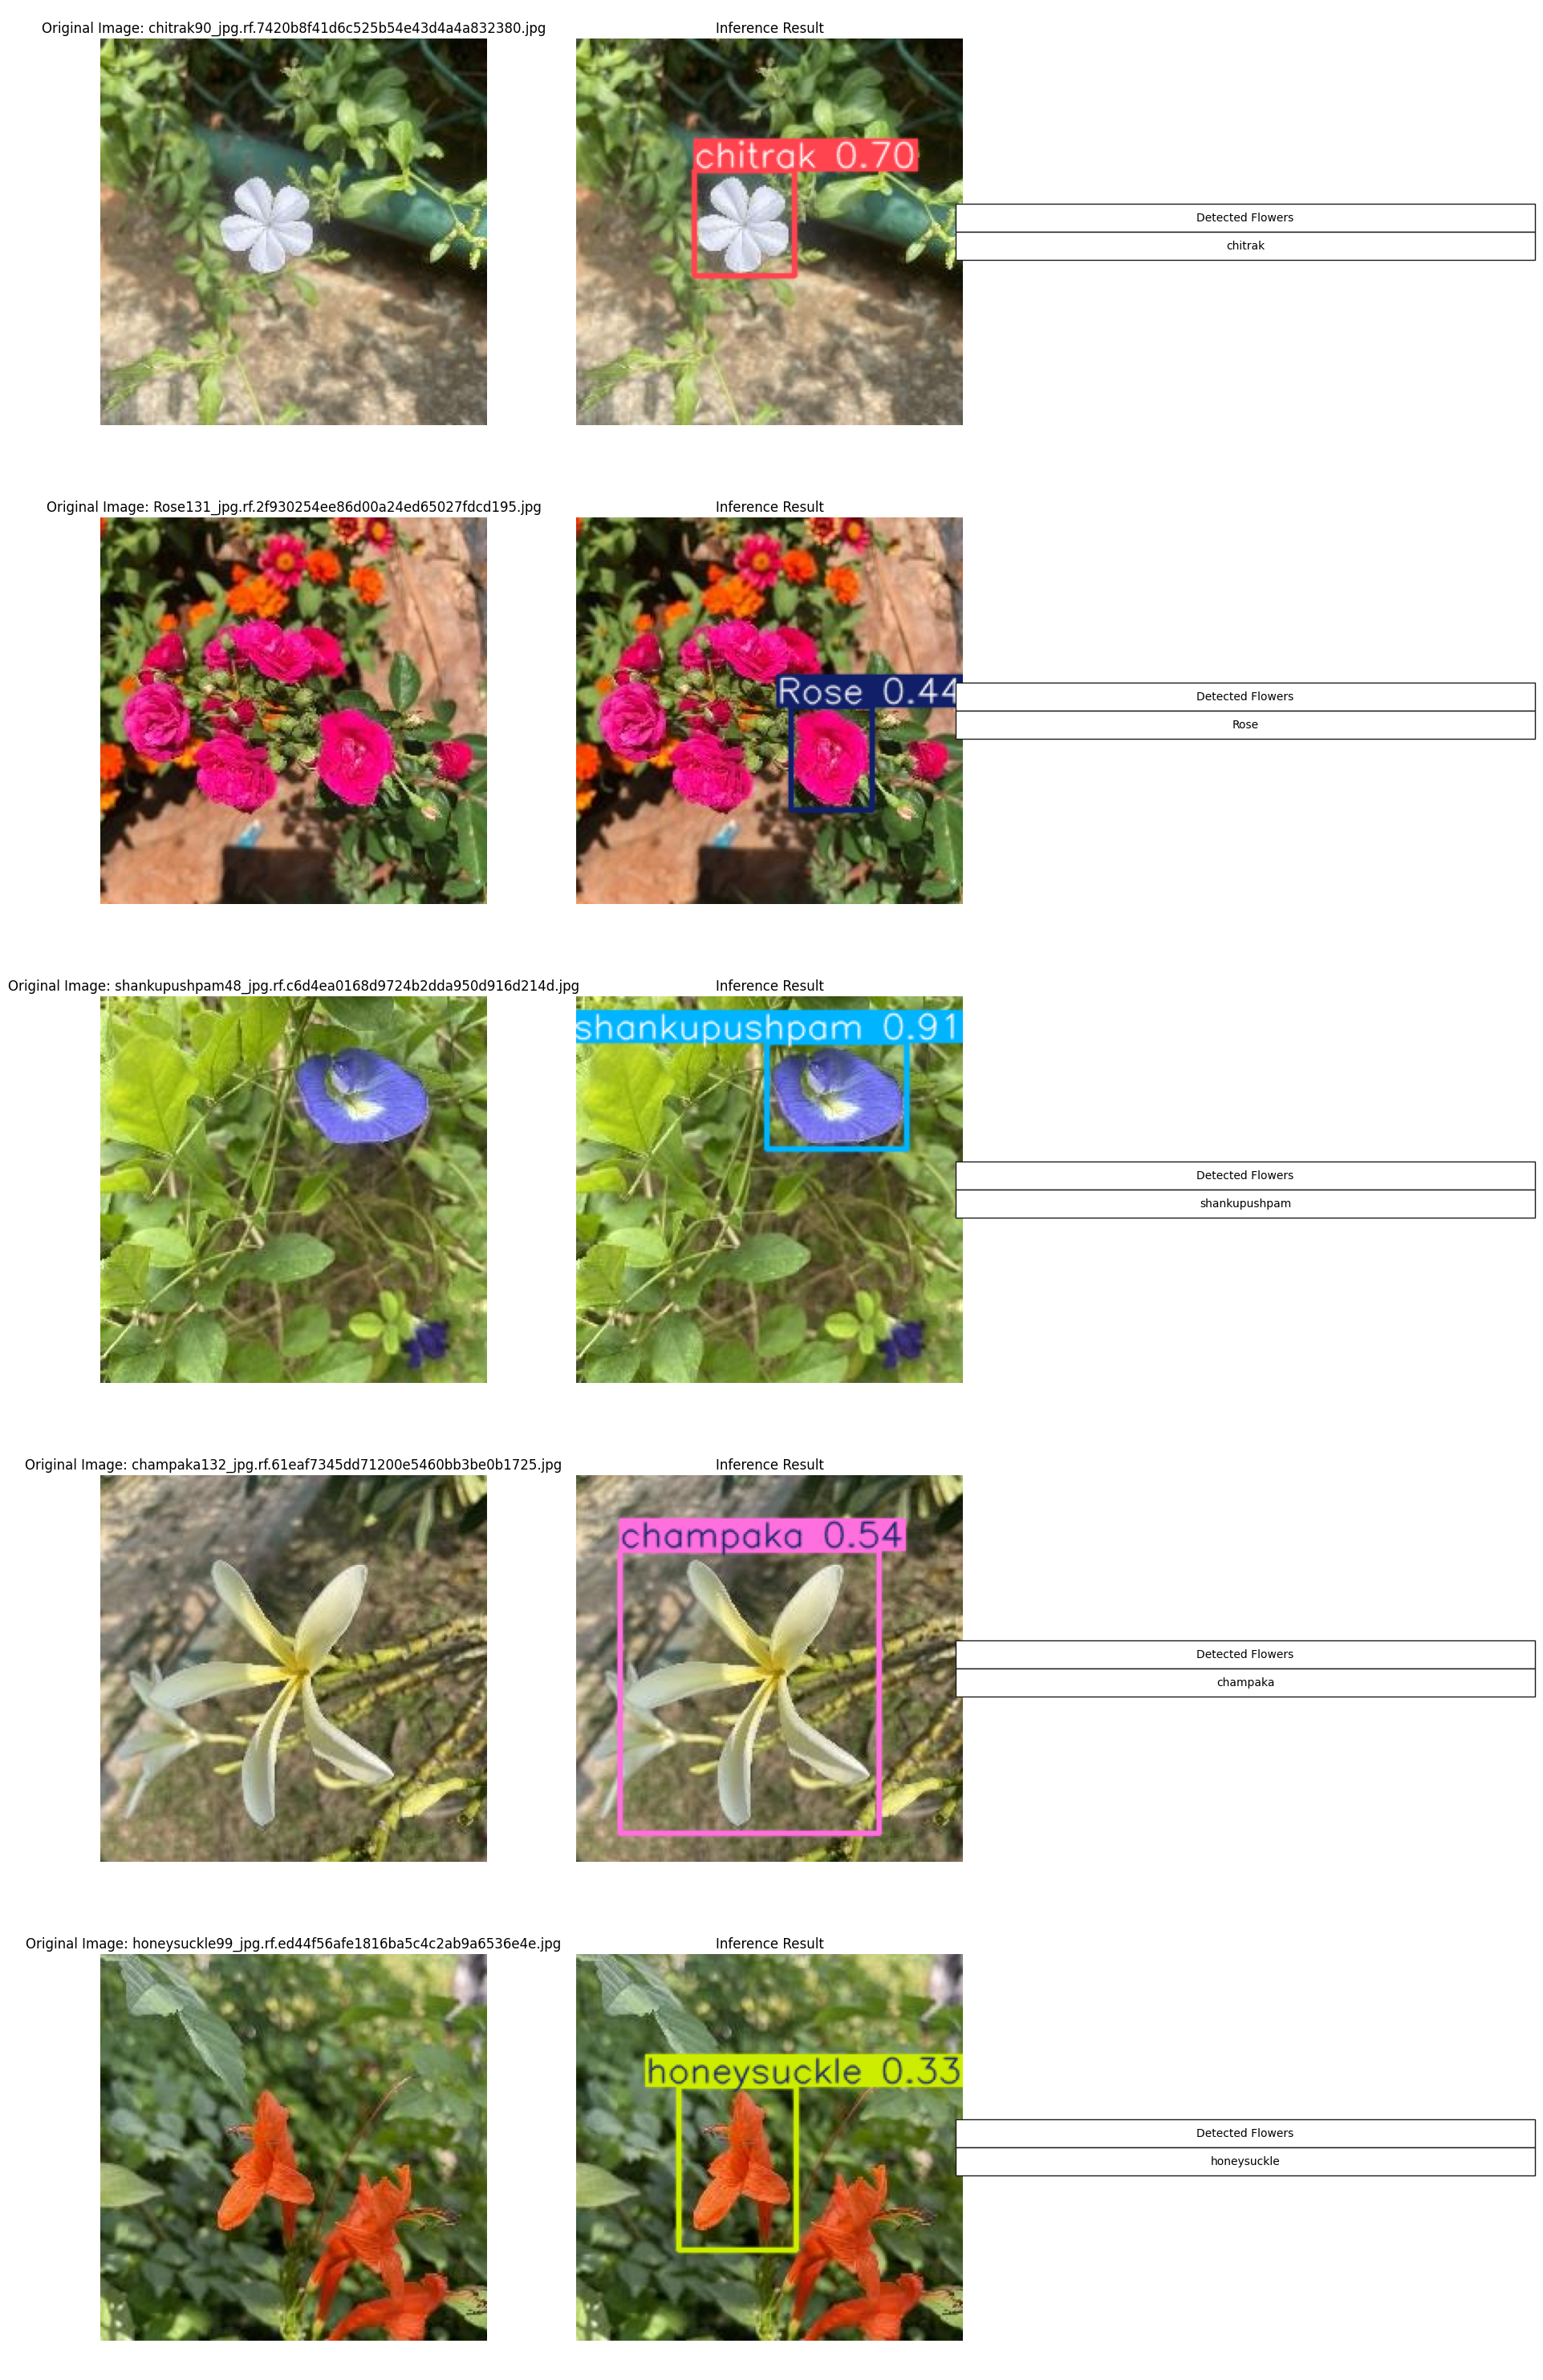

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd
import time

# Load the YOLO model (replace with your model path)
model = YOLO('/content/runs/detect/yolov10m-flowerst1/weights/best.pt')

# Path to your test image folder
image_folder = '/content/Testing set/Testing set'

# Get a list of all images in the folder
images = [img for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png', '.jpeg'))]

# Prepare to store original and annotated images, detections, and speed metrics
original_images = []
annotated_images = []
detected_flowers_list = []
speed_metrics = []

# Process each image in the folder
for image_file in images:
    image_path = os.path.join(image_folder, image_file)

    # Preprocessing - Load the image
    start_preprocess = time.time()
    image = cv2.imread(image_path)
    if image is None:
        continue  # Skip if image cannot be read
    original_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display with matplotlib
    end_preprocess = time.time()

    # Inference using YOLO model
    start_inference = time.time()
    results = model(image_path)
    end_inference = time.time()

    # Postprocessing
    start_postprocess = time.time()
    detected_flowers = []
    for result in results:
        annotated_image = result.plot()  # Annotate with all detections
        annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)  # Convert annotated image to RGB
        annotated_images.append(annotated_image)

        for box in result.boxes:
            cls = box.cls.item()  # Class ID of the detection
            class_name = model.names[int(cls)]  # Get the class name from the model
            detected_flowers.append(class_name)

    detected_flowers_list.append(detected_flowers)
    end_postprocess = time.time()

    # Record speed metrics
    preprocess_time = (end_preprocess - start_preprocess) * 1000  # Convert to ms
    inference_time = (end_inference - start_inference) * 1000  # Convert to ms
    postprocess_time = (end_postprocess - start_postprocess) * 1000  # Convert to ms
    total_time = preprocess_time + inference_time + postprocess_time

    speed_metrics.append({
        'preprocess': preprocess_time,
        'inference': inference_time,
        'postprocess': postprocess_time,
        'total': total_time
    })

# Calculate average speed metrics
if speed_metrics:
    avg_preprocess = sum([x['preprocess'] for x in speed_metrics]) / len(speed_metrics)
    avg_inference = sum([x['inference'] for x in speed_metrics]) / len(speed_metrics)
    avg_postprocess = sum([x['postprocess'] for x in speed_metrics]) / len(speed_metrics)
    avg_total = sum([x['total'] for x in speed_metrics]) / len(speed_metrics)
    fps = 1000 / avg_total

    print(f"Average Speed Metrics (ms per image):")
    print(f"  Preprocessing: {avg_preprocess:.2f} ms")
    print(f"  Inference: {avg_inference:.2f} ms")
    print(f"  Postprocessing: {avg_postprocess:.2f} ms")
    print(f"  Total: {avg_total:.2f} ms")
    print(f"Estimated FPS: {fps:.2f} frames per second")

# Display 3 to 5 random original and annotated images side by side along with a table of detected flowers
num_images_to_display = min(5, len(original_images))  # Display up to 5 images or fewer if less available
if num_images_to_display >= 3:  # Ensure there are at least 3 images to display

    indices = random.sample(range(len(original_images)), num_images_to_display)
    fig, axes = plt.subplots(num_images_to_display, 3, figsize=(18, 6 * num_images_to_display))  # 3 columns

    for i, idx in enumerate(indices):
        # Display original image in the first column
        axes[i, 0].imshow(original_images[idx])
        axes[i, 0].axis('off')  # Hide axis
        axes[i, 0].set_title(f'Original Image: {images[idx]}')

        # Display annotated image (inference result) in the second column
        axes[i, 1].imshow(annotated_images[idx])
        axes[i, 1].axis('off')  # Hide axis
        axes[i, 1].set_title('Inference Result')

        # Create a table for the detected flowers and display it in the third column
        detected_flowers_df = pd.DataFrame({'Detected Flower': detected_flowers_list[idx]})

        # Plot table in the third column
        axes[i, 2].axis('off')
        table_data = detected_flowers_df.values
        table = axes[i, 2].table(cellText=table_data, colLabels=['Detected Flowers'], loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.5, 1.5)

    plt.tight_layout()
    plt.show()

else:
    print("Not enough images available to display.")


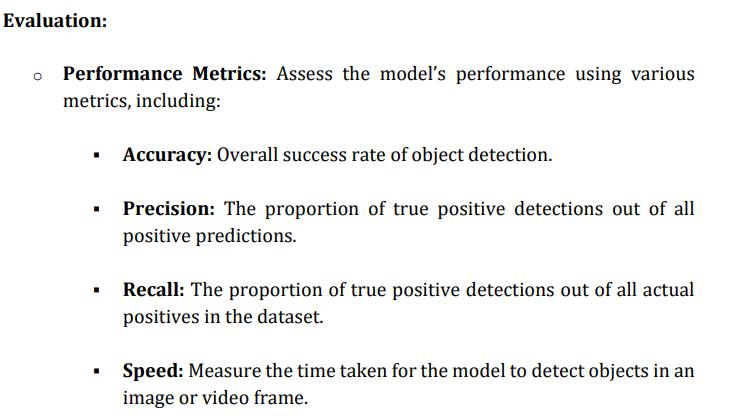

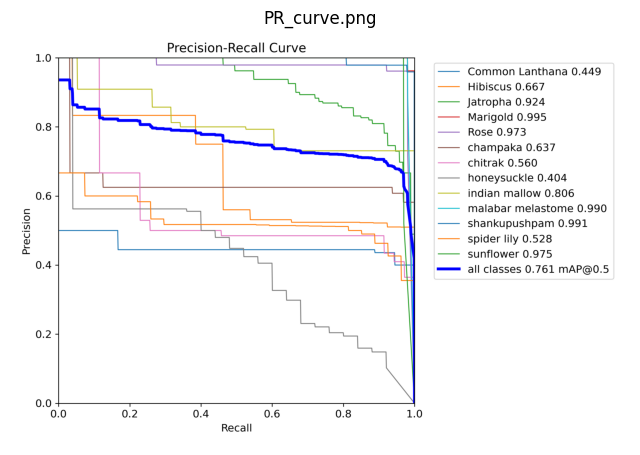

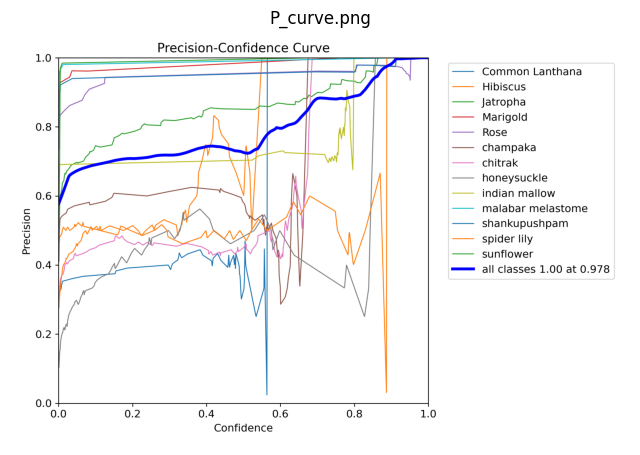

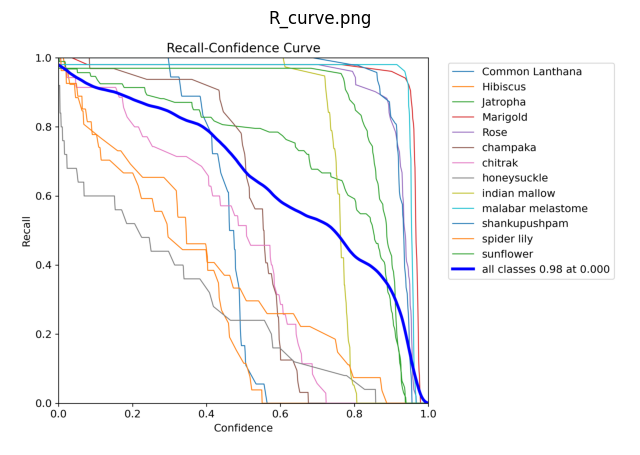

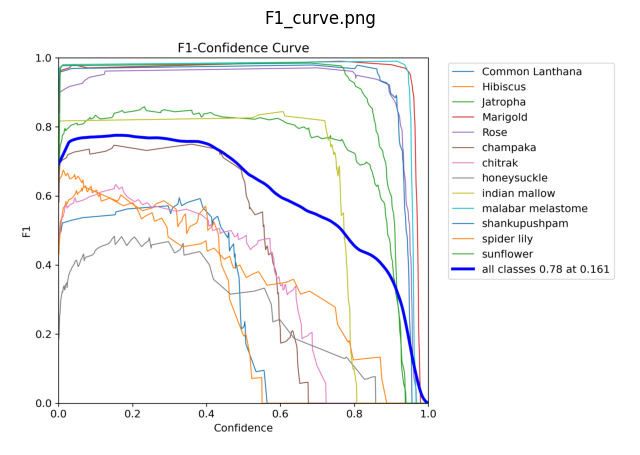

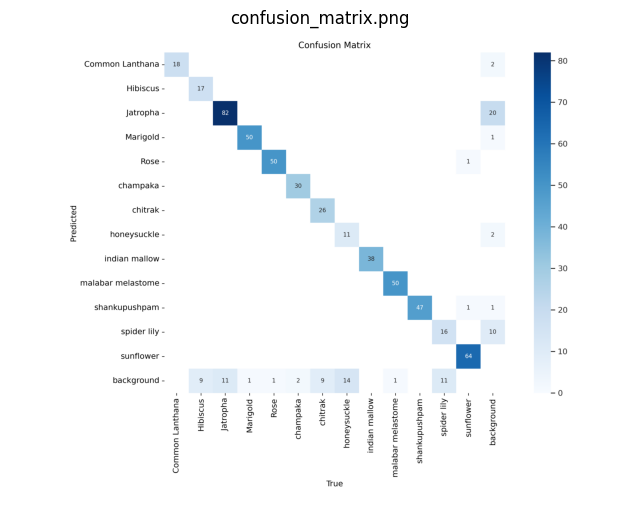

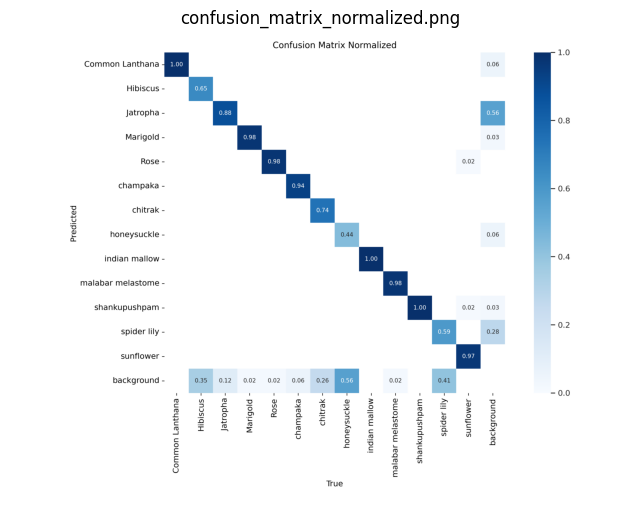

Final Training Metrics:
    Precision   Recall   mAP@50  mAP@50-95
99    0.68977  0.87253  0.74898    0.63364


In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd

#Model
results_folder = 'runs/detect/yolov10m-flowerst1/'

image_files = [
    'PR_curve.png',
    'P_curve.png',
    'R_curve.png',
    'F1_curve.png',
    'confusion_matrix.png',
    'confusion_matrix_normalized.png'
]

# Function to display each image
for image_file in image_files:
    image_path = os.path.join(results_folder, image_file)
    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        plt.title(image_file)
        plt.show()
    else:
        print(f"{image_file} not found in {results_folder}")

results_csv_path = os.path.join(results_folder, 'results.csv')
results_df = pd.read_csv(results_csv_path)
results_df.columns = results_df.columns.str.strip()

# Extract the last row to display the final metrics
final_metrics = results_df.tail(1)[['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']]

# Rename columns for better readability
final_metrics.columns = ['Precision', 'Recall', 'mAP@50', 'mAP@50-95']

# Display the final metrics
print("Final Training Metrics:")
print(final_metrics)


# **Evaluating Best.Pt for inference**

In [ ]:
import os
import pandas as pd

# Path to the folder where the training logs and results are stored
results_folder = 'runs/detect/yolov10m-flowerst1/'

results_csv_path = os.path.join(results_folder, 'results.csv')

if os.path.exists(results_csv_path):
    results_df = pd.read_csv(results_csv_path)


    results_df.columns = results_df.columns.str.strip()
    best_epoch = results_df['metrics/mAP50(B)'].idxmax()

    best_metrics = results_df.loc[best_epoch, ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']]
    best_metrics.index = ['Precision', 'Recall', 'mAP@50', 'mAP@50-95']

    # Display the metrics
    print(f"Metrics for Best Checkpoint (Epoch {best_epoch}):")
    print(best_metrics)

else:
    print(f"CSV file not found in {results_folder}")

Metrics for Best Checkpoint (Epoch 75):
Precision    0.69556
Recall       0.91492
mAP@50       0.76905
mAP@50-95    0.63957
Name: 75, dtype: float64
